fonction création de cercles concentriques sur une matrice quelquonque

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

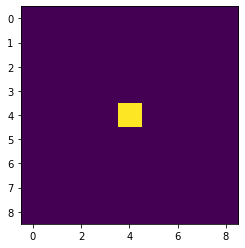

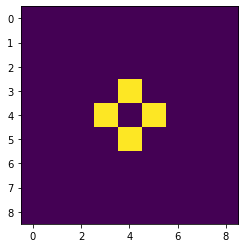

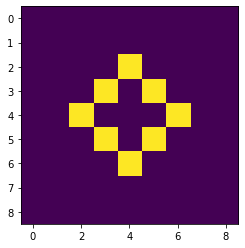

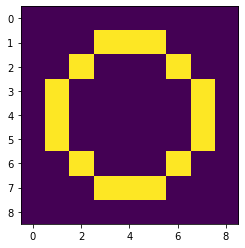

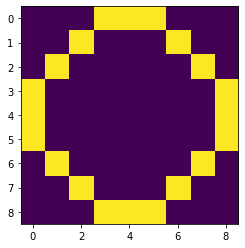

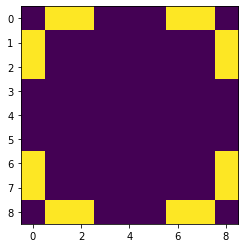

In [32]:

taille_matrice=9

def distance_point_centre(i,j,taille):
    
        centre = taille/2 
        distance = np.sqrt(((i+0.5)-centre)**2 + ((j+0.5)-centre)**2)
        return distance



def cercleconc(taille):
    l=[]
    for k in range (0,taille//2+2):
        
        base= np.zeros((taille,taille))
        
        for i in range(taille):
            for j in range(taille):
                
                if distance_point_centre(i,j,taille)< k+0.2 and distance_point_centre(i,j,taille) > k-0.6:
                    base[i,j]=1
                    base[j,i]=1
                    
                

        l.append(base)
        
    return(l)



liste=cercleconc(taille_matrice)

for mat in liste:
    plt.imshow(mat)
    plt.show()


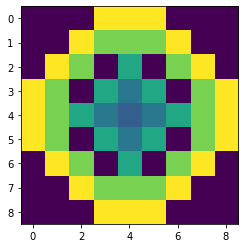

In [33]:
base=liste[0]
for k in range (1,taille_matrice//2+2):
    base=base+(2*k)*liste[k-1]

plt.imshow(base)
plt.show()





        

In [1]:


def build_base_vectors(self):
    kernel_size = self.init_kernel_size
    base_vectors = []
    taille = kernel_size
        
    def distance_point_centre(i,j,taille):
        centre = taille/2 - 0.5
        distance = np.sqrt(((i+0.5)-centre)**2 + ((j+0.5)-centre)**2)
        return distance
        
    for k in range (0,taille//2):
        base= np.zeros((taille,taille))
        for i in range(taille):
            for j in range(taille):
                print(i,j,distance_point_centre(i,j,taille))
                if distance_point_centre(i,j,taille)< k+0.5 and distance_point_centre(i,j,taille) > k-0.5:
                    base[i,j]=1
                    base[j,i]=1
        
        
    base_vectors.append(base)
    base_vectors = np.asarray(base_vectors)
    return base_vectors

##



def build_base_vectors(self):
    kernel_size = self.init_kernel_size
    dimensions = self.init_dimensions
    base_vectors = []
    taille = kernel_size
    centre = taille/2 
    for k in range (0,taille//2):
        base= np.zeros([taille]*dimensions)
        for i in range(taille):
            for j in range(taille):
                
                if np.sqrt(((i+0.5)-centre)**2 + ((j+0.5)-centre)**2)< k+0.1 and np.sqrt(((i+0.5)-centre)**2 + ((j+0.5)-centre)**2) > k-0.6:
                    base[i,j]=1
                    base[j,i]=1
        base_vectors.append(base)
        
    base_vectors = np.asarray(base_vectors)
    return base_vectors



In [ ]:
    def build_base_vectors(self):
        kernel_size = self.init_kernel_size
        middle = kernel_size // 2
        dimensions = self.init_dimensions

        base_vectors = []
        # Burning phase: determine the number of base vectors
        unique_distances = []
        if dimensions == 2:
            for i in range(kernel_size):
                for j in range(kernel_size):
                    i_ = abs(i - middle)
                    j_ = abs(j - middle)
                    unique_distances.append(int(i_ * i_ + j_ * j_))
        elif dimensions == 3:
            for i in range(kernel_size):
                for j in range(kernel_size):
                    for k in range(kernel_size):
                        i_ = abs(i - middle)
                        j_ = abs(j - middle)
                        k_ = abs(k - middle)
                        unique_distances.append(int(i_ * i_ + j_ * j_ + k_ * k_))
        unique_distances, distances_counts = np.unique(unique_distances, return_counts=True)
        unique_distances = np.sort(unique_distances)
        print(*zip(unique_distances, distances_counts), len(unique_distances))

        for unique_distance, n in zip(unique_distances, distances_counts):  # number of base vectors
            base_vector = np.zeros([kernel_size] * dimensions)
            if dimensions == 2:
                for i in range(kernel_size):
                    for j in range(kernel_size):
                        i_ = abs(i - middle)
                        j_ = abs(j - middle)
                        if int(i_ * i_ + j_ * j_) == unique_distance:
                            base_vector[i, j] = 1./n
            elif dimensions == 3:
                for i in range(kernel_size):
                    for j in range(kernel_size):
                        for k in range(kernel_size):
                            i_ = abs(i - middle)
                            j_ = abs(j - middle)
                            k_ = abs(k - middle)
                            if int(i_ * i_ + j_ * j_ + k_ * k_) == unique_distance:
                                base_vector[i, j, k] = 1./n
            base_vectors.append(base_vector)
        base_vectors = np.asarray(base_vectors)
        return base_vectors
